In [21]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Resize
from torchmetrics import JaccardIndex

from model import Unet
from load import CustomDataset, ImageData

## Load model

In [2]:
#To load the saved version of the model
saved_model = Unet()
saved_model.load_state_dict(torch.load('./model_20220924_181205_17_iou'))

<All keys matched successfully>

## Load data

In [3]:
size = (128,128)

In [4]:
#Define a transform object that takes the data to pytorch tensor form and normalizes it
img_transform = Compose( [Resize(size), ToTensor()] )

In [5]:
data = ImageData(directory='./predimages/',transform=img_transform)

In [22]:
data_loader = DataLoader(
    dataset = data,
    batch_size = 1,
    shuffle = False,
    num_workers = 1
)

## Predict

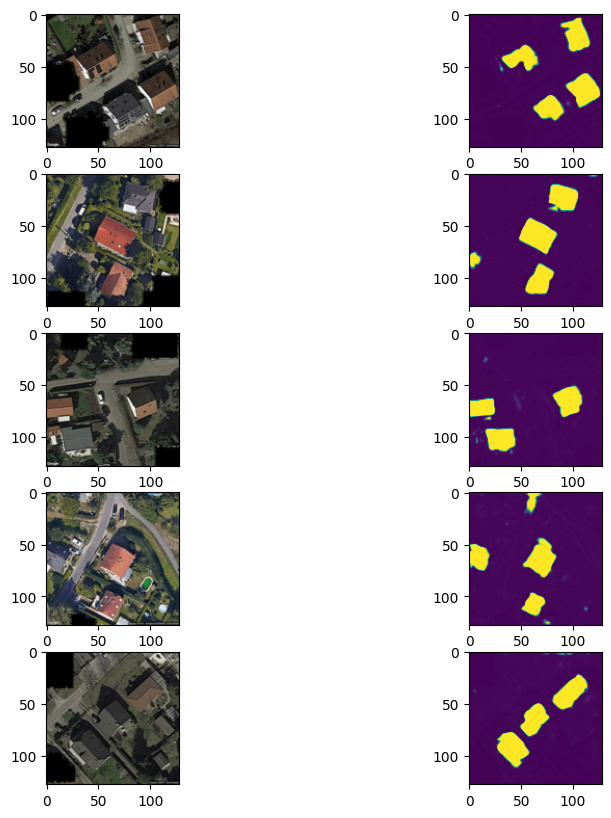

In [32]:
image_it = iter(data_loader)
iou_av = 0
iou_sq = 0
cnt = 0
fig, ax = plt.subplots(len(data),2,figsize=(10,10))
for it in image_it:
    #print(it.shape)
    ax[cnt][0].imshow(it[0].permute(1,2,0))
    
    out = saved_model(it)
    #print(out.shape)
    ax[cnt][1].imshow(out[0][0].detach().numpy())
    
    cnt += 1
